<center><h1 style="color:red">Salários de Jogadores da NBA</h1></center>

<p style="background-color:skyblue; border-left:5px solid blue"><b>by Felix</b></p>

<p style="color:blue">O arquivo <i>nba.csv</i> consiste num dataset contendo os dados de jogadores profissionais de basquete nos EUA. Sua função é realizar um levantamento dos jogadores que recebem um salário mensal menor do que a média. Uma boa prática seria relacioná-los com os times a qual pertencem.</p>

<hr style="background-color:gold">

<center><h2 style="color:red">Estrutura da Tabela</h2></center>

<table >
    <tr >
        <th style="border-collapse:collapse; border: 2px solid black">Name</th>
        <th style="border-collapse:collapse; border: 2px solid black">Team</th>
        <th style="border-collapse:collapse; border: 2px solid black">Number</th>
        <th style="border-collapse:collapse; border: 2px solid black">Position</th>
        <th style="border-collapse:collapse; border: 2px solid black">Age</th>
        <th style="border-collapse:collapse; border: 2px solid black">Height</th>
        <th style="border-collapse:collapse; border: 2px solid black">Weight</th>
        <th style="border-collapse:collapse; border: 2px solid black">College</th>
        <th style="border-collapse:collapse; border: 2px solid black">Salary</th>
    </tr>
    <tr>
        <td style="border-collapse:collapse; border: 2px solid black">Avery Bradley</td>
        <td style="border-collapse:collapse; border: 2px solid black">Boston Celtics</td>
        <td style="border-collapse:collapse; border: 2px solid black">0.0</td>
        <td style="border-collapse:collapse; border: 2px solid black">PG</td>
        <td style="border-collapse:collapse; border: 2px solid black">25.0</td>
        <td style="border-collapse:collapse; border: 2px solid black">6-2</td>
        <td style="border-collapse:collapse; border: 2px solid black">180.0</td>
        <td style="border-collapse:collapse; border: 2px solid black">Texas</td>
        <td style="border-collapse:collapse; border: 2px solid black">7730337.000</td>
    </tr>
</table>

<hr style="background-color:gold">

<h3 style="color:red">** Ferramentas **</h3>

In [1]:
# Importações
import pandas as pd
import csv
import json
import matplotlib.pyplot as plt

<h3 style="color:red">1) Limpeza</h3>

In [2]:
# Funções
def Limpeza_Dados(lista):
    """Extrai apenas as colunas de nome, time, colégio e salário do jogador"""
    lista_limpa = []
    for linha in lista: lista_limpa.append([linha[0], linha[1], linha[7], linha[8]])
    return lista_limpa

In [3]:
# Leitura do arquivo
arquivo = Limpeza_Dados(pd.read_csv('arquivos/nba original.csv').sort_values(by = 'Salary').values.tolist()) # pegar colunas 1,2,8,9

# Salvando dados limpos em um novo csv
with open('arquivos/nba.csv', 'w', newline = '') as f:
    escrita = csv.writer(f)
    escrita.writerow(['Name', 'Team', 'College', 'Salary']) # cabeçalho
    for linha in arquivo: escrita.writerow(linha)

In [4]:
# Retirando valores NaN do arquivo e salvando no arquivo csv
arquivo = pd.read_csv('arquivos/nba.csv').dropna().values.tolist()

with open('arquivos/nba.csv', 'w', newline = '') as f:
    escrita = csv.writer(f)
    escrita.writerow(['Name', 'Team', 'College', 'Salary']) # cabeçalho
    for linha in arquivo: escrita.writerow(linha)

In [5]:
del arquivo

<h3 style="color:red">2) Processamento</h3>

In [6]:
# Dados estatísticos
arquivo = pd.read_csv('arquivos/nba.csv')
arquivo.describe(include = ['object', 'float'])

,Name,Team,College,Salary
count,364,364,364,3.640000e+02
unique,364,30,115,NaN
top,Alan Williams,New Orleans Pelicans,Kentucky,NaN
freq,1,16,22,NaN
mean,NaN,NaN,NaN,4.620311e+06
std,NaN,NaN,NaN,5.119716e+06
min,NaN,NaN,NaN,5.572200e+04
25%,NaN,NaN,NaN,1.000000e+06
50%,NaN,NaN,NaN,2.515440e+06
75%,NaN,NaN,NaN,6.149694e+06


In [7]:
# Extraindo média dos salários
media_salario = float(arquivo.mean())
media_salario = round(media_salario, 2) # arredondamento com duas casas decimais

# Transformando a leitura do arquivo numa lista
arquivo = arquivo.values.tolist()

<h3 style="color:red">2.1) Estruturação dos Dados</h3>

In [8]:
# Funções
def Extrair_Times(lista):
    """Retorna apenas os nomes dos times"""
    times = []
    for linha in lista: times.append(linha[1])
    return set(times)

def Extrair_Jogadores(nome_time, lista):
    """Retorna apenas nomes, colégios e salários dos jogadores"""
    jogadores = []

    for linha in lista:
        if linha[1] == nome_time: jogadores.append([linha[0], linha[2], linha[3]])
                                                    
    return jogadores

In [9]:
# Extraindo nomes dos times
set_times = Extrair_Times(arquivo)

# Extraindo jogadores para dentro de um dicionário: (chave, valor) >> (nome do time, jogador)
dicionario = {}
for chave in set_times: dicionario[chave] = Extrair_Jogadores(chave, arquivo)

In [10]:
del arquivo

<h3 style="color:red">2.2) Análise dos Dados</h3>

In [11]:
# Funções
def Extrair_Abaixo_Media(jogadores):
    """Retorna jogadores que possuem salário abaixo da média"""
    retorno = []
    
    for jogador in jogadores:
        if jogador[2] < media_salario: retorno.append(jogador)
    
    return retorno

In [12]:
# Extraindo apenas os jogadores que possuem salário abaixo da média
abaixo_media = {}
for chave in set_times: abaixo_media[chave] = Extrair_Abaixo_Media(dicionario[chave])

In [13]:
del dicionario

<h3 style="color:red">2.3) Salvando Jogadores Extraídos</h3>

In [14]:
# Salvando jogadores num novo csv
with open('arquivos/nba_salario_abaixo_media.csv', 'w', newline = '') as f:
    escrita = csv.writer(f)
    escrita.writerow(['Name', 'Team', 'College', 'Salary'])
    
    for chave in abaixo_media:
        for jogador in range(0, len(abaixo_media[chave]), 1): 
            escrita.writerow([abaixo_media[chave][jogador][0],
                              chave,
                              abaixo_media[chave][jogador][1],
                              abaixo_media[chave][jogador][2]])

<h3 style="color:red">3) Visualização</h3>

In [15]:
# Funções
def Quantidade_Jogadores(dicionario):
    """Retorna quantidade de elementos armazenados no dicionário de jogadores com salários abaixo da média"""
    qnt = 0
    for chave in dicionario: qnt += len(dicionario[chave])
    return qnt

porcentagem = lambda parte, total: round(parte / total * 100, 2) # retorna porcentagem do time representante sobre o total de elementos

def Jogadores(time, dicionario):
    """Retorna lista contendo jogadores de um determinado time"""
    lista_jogadores = []
    for jogador in range(0, len(dicionario[time]), 1): lista_jogadores.append(dicionario[time][jogador][0])
    return lista_jogadores

In [16]:
# Encontrando porcentagem de cada time abaixo da média
quantidade_abaixo_media = Quantidade_Jogadores(abaixo_media)
porcentagem_times = {}

for chave in abaixo_media: porcentagem_times[chave] = porcentagem(len(abaixo_media[chave]), quantidade_abaixo_media)

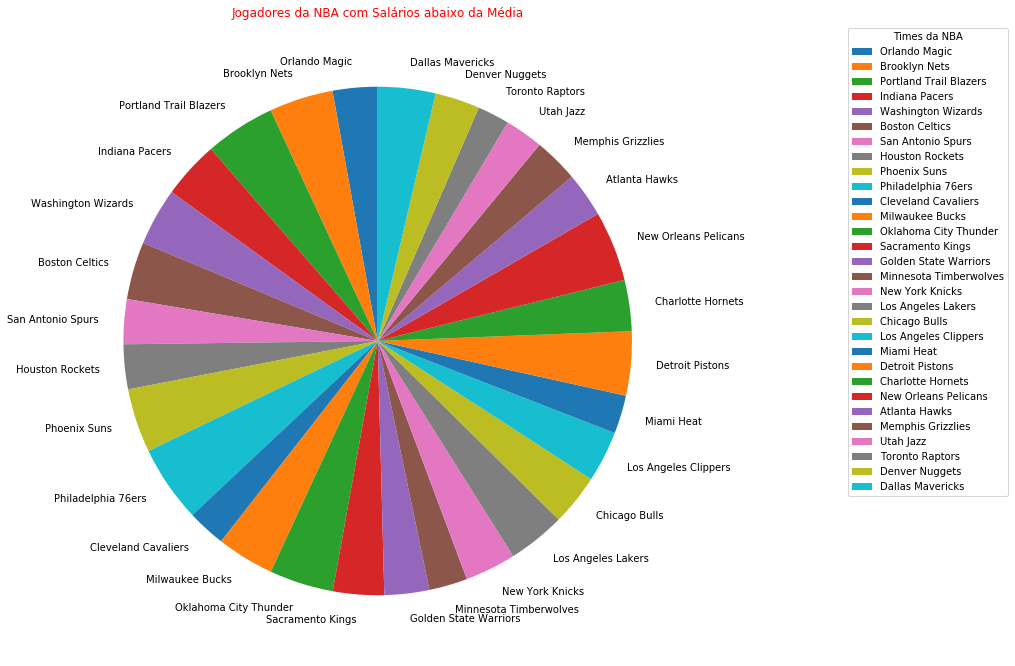

In [17]:
# Pegando valores para montagem do gráfico
times, porcentagens = list(porcentagem_times.keys()), list(porcentagem_times.values())

# Montagem do Gráfico de Pizza
plt.figure(figsize = (15, 15))

plt.pie(porcentagens, labels = times, startangle = 90)

plt.title('Jogadores da NBA com Salários abaixo da Média', color = 'red')
plt.legend(title = 'Times da NBA', bbox_to_anchor=(1.5,1.0))

plt.tight_layout()

In [18]:
# Coletando jogadores >> [time, [nome dos jogadores], porcentagem]
dados = []
for chave in porcentagem_times: dados.append([chave, porcentagem_times[chave]])
    
# Exibindo a tabela
print('(Team, Porcentage)')
print('-' * 18)

for elemento in dados: 
    linha = '(' + elemento[0] + ', ' + str(elemento[1]) + '%)'
    print(linha)

(Team, Porcentage)
------------------
(Orlando Magic, 2.85%)
(Brooklyn Nets, 4.07%)
(Portland Trail Blazers, 4.47%)
(Indiana Pacers, 3.66%)
(Washington Wizards, 3.66%)
(Boston Celtics, 3.66%)
(San Antonio Spurs, 2.85%)
(Houston Rockets, 2.85%)
(Phoenix Suns, 4.07%)
(Philadelphia 76ers, 4.88%)
(Cleveland Cavaliers, 2.44%)
(Milwaukee Bucks, 3.66%)
(Oklahoma City Thunder, 4.07%)
(Sacramento Kings, 3.25%)
(Golden State Warriors, 2.85%)
(Minnesota Timberwolves, 2.44%)
(New York Knicks, 3.25%)
(Los Angeles Lakers, 3.66%)
(Chicago Bulls, 3.25%)
(Los Angeles Clippers, 3.25%)
(Miami Heat, 2.44%)
(Detroit Pistons, 4.07%)
(Charlotte Hornets, 3.25%)
(New Orleans Pelicans, 4.47%)
(Atlanta Hawks, 2.85%)
(Memphis Grizzlies, 2.85%)
(Utah Jazz, 2.44%)
(Toronto Raptors, 2.03%)
(Denver Nuggets, 2.85%)
(Dallas Mavericks, 3.66%)


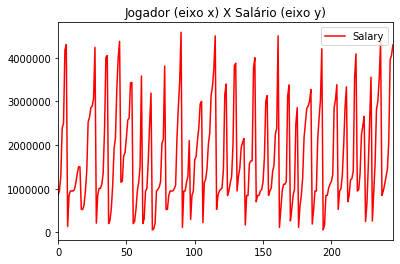

In [19]:
# Plot dos Jogadores
arquivo = pd.read_csv('arquivos/nba_salario_abaixo_media.csv')
arquivo.plot(title = 'Jogador (eixo x) X Salário (eixo y)', color = 'red')

In [20]:
# Visualização dos jogadores com saláros abaixo da média
quantidade_linhas = len(arquivo.values.tolist())
arquivo.head(quantidade_linhas)

,Name,Team,College,Salary
0,Devyn Marble,Orlando Magic,Iowa,845059.0
1,Dewayne Dedmon,Orlando Magic,USC,947276.0
2,Shabazz Napier,Orlando Magic,Connecticut,1294440.0
3,Andrew Nicholson,Orlando Magic,St. Bonaventure,2380593.0
4,Elfrid Payton,Orlando Magic,Louisiana-Lafayette,2505720.0
5,Aaron Gordon,Orlando Magic,Arizona,4171680.0
6,Jason Smith,Orlando Magic,Colorado State,4300000.0
7,Sean Kilpatrick,Brooklyn Nets,Cincinnati,134215.0
8,Markel Brown,Brooklyn Nets,Oklahoma State,845059.0
9,Henry Sims,Brooklyn Nets,Georgetown,947276.0


In [21]:
del abaixo_media, quantidade_abaixo_media, porcentagem_times, times, porcentagens, dados, quantidade_linhas

<h3 style="color:red">4) Armazenamento</h3>

In [22]:
# Funções
def Extracao(lista):
    nomes, times, colegios, salarios = [], [], [], []
    
    for linha in lista:
        nomes.append(linha[0])
        times.append(linha[1])
        colegios.append(linha[2])
        salarios.append(linha[3])
    
    return nomes, times, colegios, salarios

In [23]:
# Salvar dados do arquivo 'nba_salario_abaixo_media.csv' em JSON e TXT #

# Preparação das variáveis
dicionario = {}
arquivo = pd.read_csv('arquivos/nba_salario_abaixo_media.csv').values.tolist()
nomes, times, colegios, salarios = Extracao(arquivo)
dados_txt = []

# Alimentando o dicionário (salvar no json)
dicionario['Name'] = nomes
dicionario['Team'] = times
dicionario['College'] = colegios
dicionario['Salary'] = salarios

# Alimentando a lista de dados (salvar no txt)
with open('arquivos/nba_salario_abaixo_media.json', 'r', newline = '') as f:
    arquivo = f.read()
    arquivo = json.loads(arquivo)
    
for tipo_dado in arquivo.keys(): dados_txt.append('{chave} = {valor}'.format(chave = tipo_dado, valor = arquivo[tipo_dado]))

# Salvando dados no arquivo JSON
with open('arquivos/nba_salario_abaixo_media.json', 'w', newline = '') as f: f.write(json.dumps(dicionario))
    
# Salvando dados no arquivo txt
with open('arquivos/nba_salario_abaixo_media.txt', 'w', newline= '') as f:
    for elemento in dados_txt: f.write(elemento + '\n\n')

In [24]:
del dicionario, arquivo, nomes, times, colegios, salarios, dados_txt